# By utilizing this dataset, researchers and analysts can explore patterns, trends, and relationships between laptop 
specifications and their pricing. It serves as an excellent resource for tasks such as price prediction, market analysis, 
and comparison of different laptop configurations. Whether you are interested in identifying the most cost-effective options 
or understanding the impact of specific hardware components on laptop prices, this dataset offers abundant possibilities for
in-depth exploration.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
def read_data():
    data = pd.read_csv("C:\\Users\dell\Downloads\laptops.csv")
    return data
data = read_data()

In [3]:
data.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
data.tail()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99
2159,Razer Book FHD+ Intel Evo Core i7-1165G7/16GB/...,Refurbished,Razer,Book,Intel Evo Core i7,16,256,SSD,NaN,13.4,Yes,1699.99


In [5]:
data.describe(include='all')

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
count,2160,2160,2160,2160,2160,2160.000000,2160.000000,2118,789,2156.000000,2160,2160.000000
unique,2160,2,27,121,28,NaN,NaN,2,44,NaN,2,NaN
top,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,15S,Intel Core i7,NaN,NaN,SSD,RTX 3050,NaN,No,NaN
freq,1,1498,415,115,710,NaN,NaN,2062,129,NaN,1933,NaN
mean,NaN,NaN,NaN,NaN,NaN,15.413889,596.294444,NaN,NaN,15.168112,NaN,1312.638509
std,NaN,NaN,NaN,NaN,NaN,9.867815,361.220506,NaN,NaN,1.203329,NaN,911.475417
min,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN,10.100000,NaN,201.050000
25%,NaN,NaN,NaN,NaN,NaN,8.000000,256.000000,NaN,NaN,14.000000,NaN,661.082500
50%,NaN,NaN,NaN,NaN,NaN,16.000000,512.000000,NaN,NaN,15.600000,NaN,1031.945000
75%,NaN,NaN,NaN,NaN,NaN,16.000000,1000.000000,NaN,NaN,15.600000,NaN,1708.970000


In [6]:
data.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB
None


In [8]:
print(data.dtypes)

Laptop           object
Status           object
Brand            object
Model            object
CPU              object
RAM               int64
Storage           int64
Storage type     object
GPU              object
Screen          float64
Touch            object
Final Price     float64
dtype: object


In [9]:
print(data.columns)

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')


In [10]:
print(data.shape)

(2160, 12)


In [11]:
print(data.size)

25920


In [12]:
print(data.nunique())

Laptop          2160
Status             2
Brand             27
Model            121
CPU               28
RAM                9
Storage           12
Storage type       2
GPU               44
Screen            29
Touch              2
Final Price     1440
dtype: int64


In [13]:
data['Status'].value_counts()

New            1498
Refurbished     662
Name: Status, dtype: int64

In [14]:
data['Brand'].value_counts()

Asus                415
HP                  368
Lenovo              366
MSI                 308
Acer                137
Apple               116
Dell                 84
Microsoft            77
Gigabyte             48
Razer                37
Medion               32
LG                   32
Alurin               29
PcCom                24
Samsung              22
Dynabook Toshiba     19
Vant                 11
Primux                8
Deep Gaming           8
Innjoo                6
Thomson               4
Prixton               3
Millenium             2
Denver                1
Jetwing               1
Realme                1
Toshiba               1
Name: Brand, dtype: int64

In [15]:
data['Model'].unique()

array(['ExpertBook', 'Go', 'Katana', '15S', 'Crosshair', 'ThinkPad',
       'VivoBook', 'Akoya', 'Victus', 'V15', 'Thin', 'ROG', 'IdeaPad',
       'Cyborg', 'M515UA', 'TUF', 'Aspire', 'Pavilion', 'Vector',
       'Chromebook', 'Omen', 'ZenBook', 'Creator', 'MacBook Air',
       'ThinkBook', '250', 'Modern', '255', 'MacBook Pro', 'Prestige',
       'Stealth', 'Pulse', 'Blade', 'Legion', 'Raider', 'ProBook', 'F515',
       'G5', 'Vostro', 'Nitro', 'Gram', 'E410', 'Flex Advance', 'Bravo',
       'Aero', 'Yoga', 'Galaxy Book', 'Erazer', 'Summit', 'Ultra',
       'Extensa', 'Flex', 'EliteBook', 'Revolt', 'Latitude', 'Envy',
       'Deputy', 'Predator', 'Surface Laptop', '14w', 'Titan', 'Ioxbook',
       'Aorus', 'Swift', 'Surface Go', 'Netbook Pro', 'Surface Pro',
       'Notebook', '470', 'Spectre', 'Alurin', 'Satellite Pro', 'XPS',
       'ConceptD', 'E510', 'Beast', 'TravelMate', 'Portégé', 'Tecra',
       'Neo', 'Electronics', '14S', 'Classmate Pro', '17', 'Zbook', 'BR',
       '300w', 

In [16]:
data['CPU'].unique()

array(['Intel Core i5', 'Intel Celeron', 'Intel Core i3', 'Intel Core i7',
       'AMD Ryzen 5', 'AMD Ryzen 7', 'AMD Ryzen 3', 'Apple M1',
       'AMD Athlon', 'Apple M2', 'AMD Ryzen 9', 'Intel Core i9',
       'AMD 3020e', 'Qualcomm Snapdragon 7', 'Intel Evo Core i7',
       'Intel Evo Core i5', 'Intel Pentium', 'Apple M2 Pro',
       'AMD Radeon 5', 'Intel Evo Core i9', 'AMD 3015e', 'Apple M1 Pro',
       'Intel Core M3', 'AMD Radeon 9', 'Mediatek MT8183', 'AMD 3015Ce',
       'Qualcomm Snapdragon 8', 'Microsoft SQ1'], dtype=object)

In [17]:
print(data.isnull().sum())

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64


In [18]:
data.drop(['GPU'],axis=1,inplace=True)

In [19]:
data.drop(['Laptop'],axis=1,inplace=True)

In [20]:
data.dropna(inplace = True)

In [21]:
data.shape

(2114, 10)

In [22]:
data.duplicated().sum()

67

In [23]:
data.head(5)

,Status,Brand,Model,CPU,RAM,Storage,Storage type,Screen,Touch,Final Price
0,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,15.6,No,1009.00
1,New,Alurin,Go,Intel Celeron,8,256,SSD,15.6,No,299.00
2,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,15.6,No,789.00
3,New,MSI,Katana,Intel Core i7,16,1000,SSD,15.6,No,1199.00
4,New,HP,15S,Intel Core i5,16,512,SSD,15.6,No,669.01


<function matplotlib.pyplot.show(close=None, block=None)>

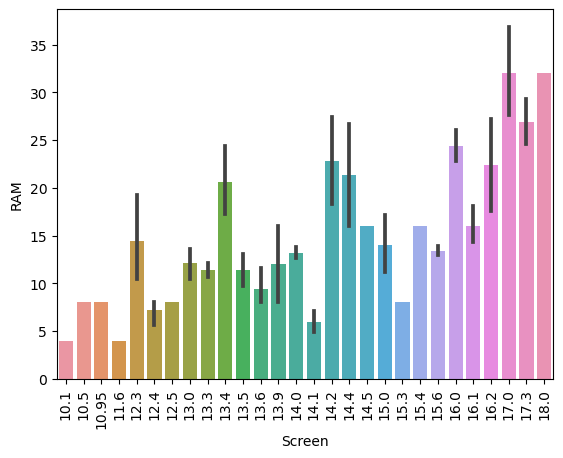

In [24]:
sns.barplot(y='RAM',x='Screen',data=data)
plt.xticks(rotation=90)
plt.show

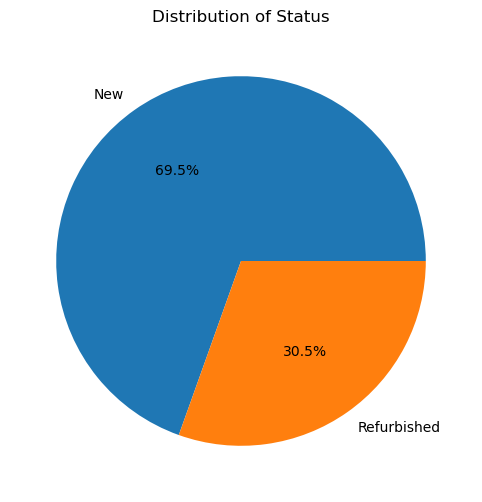

In [25]:
# 'Status' column 
plt.figure(figsize=(10, 6))
sizes = data['Status'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%')
plt.title('Distribution of Status')
plt.show()

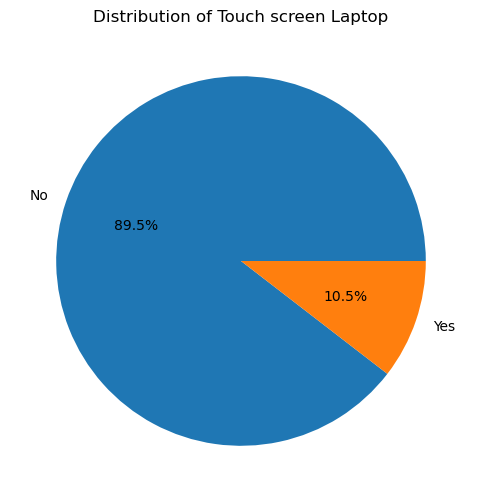

In [26]:
# 'Touch' column
plt.figure(figsize=(8, 6))
sizes = data['Touch'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%')
plt.title('Distribution of Touch screen Laptop')
plt.show()

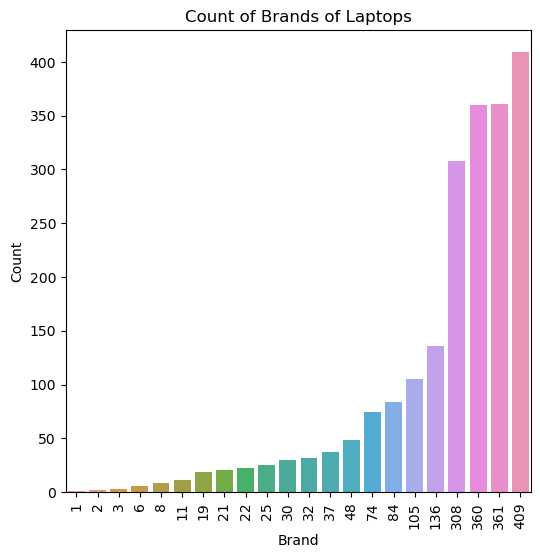

In [27]:
# 'Brand' column 
plt.figure(figsize=(6, 6))
touch_counts = data['Brand'].value_counts()
sns.barplot(x=touch_counts, y=touch_counts.values)
plt.xlabel('Brand')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Count of Brands of Laptops')
plt.show()

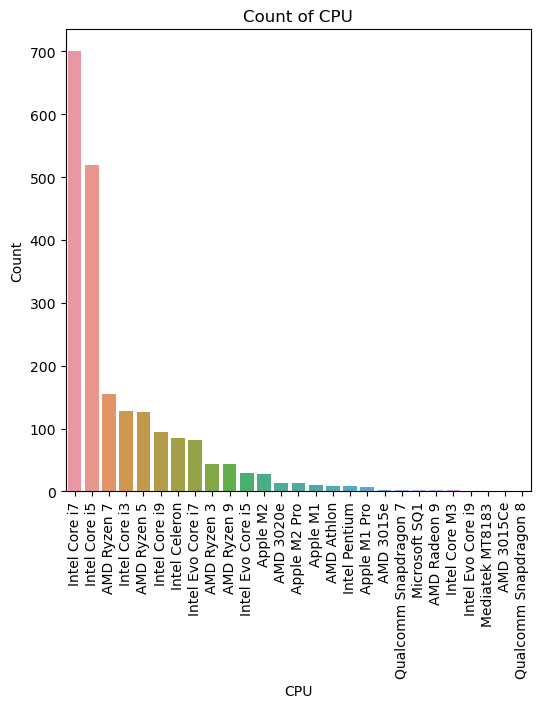

In [28]:
# 'CPU' column 
plt.figure(figsize=(6, 6))
touch_counts = data['CPU'].value_counts()
sns.barplot(x=touch_counts.index,y= touch_counts,data=data)
plt.xlabel('CPU')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Count of CPU')
plt.show()

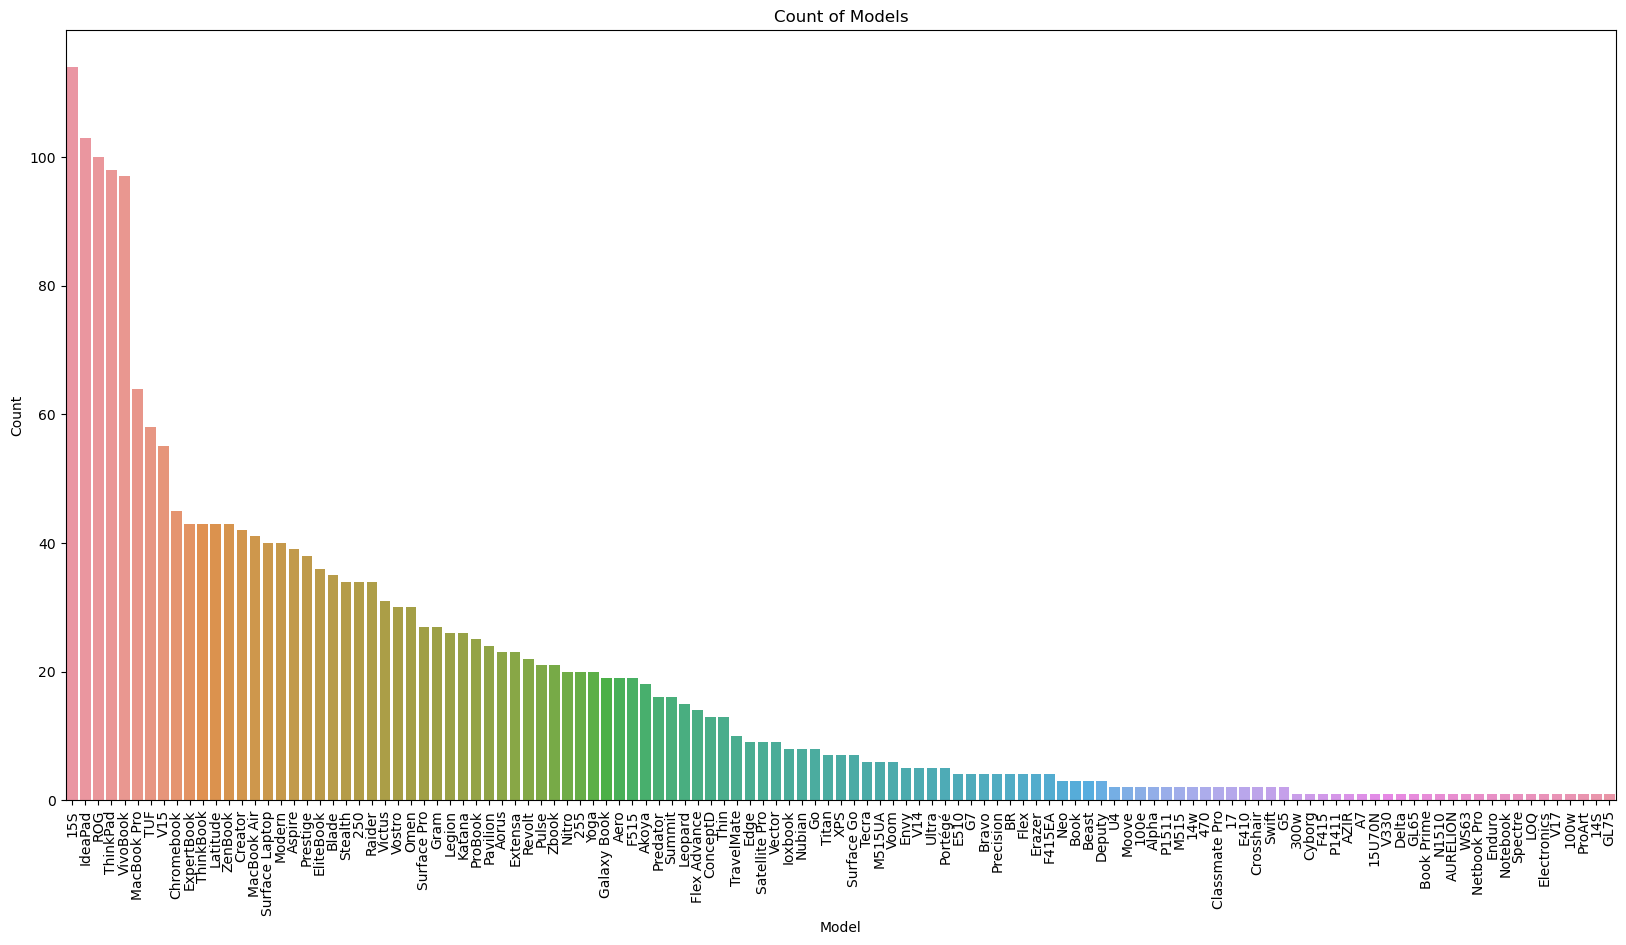

In [29]:
# 'Model' column 
plt.figure(figsize=(20, 10))
touch_counts = data['Model'].value_counts()
sns.barplot(x=touch_counts.index, y=touch_counts.values)
plt.xlabel('Model')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Count of Models')
plt.show()

array([[<Axes: title={'center': 'RAM'}>,
        <Axes: title={'center': 'Storage'}>],
       [<Axes: title={'center': 'Screen'}>,
        <Axes: title={'center': 'Final Price'}>]], dtype=object)

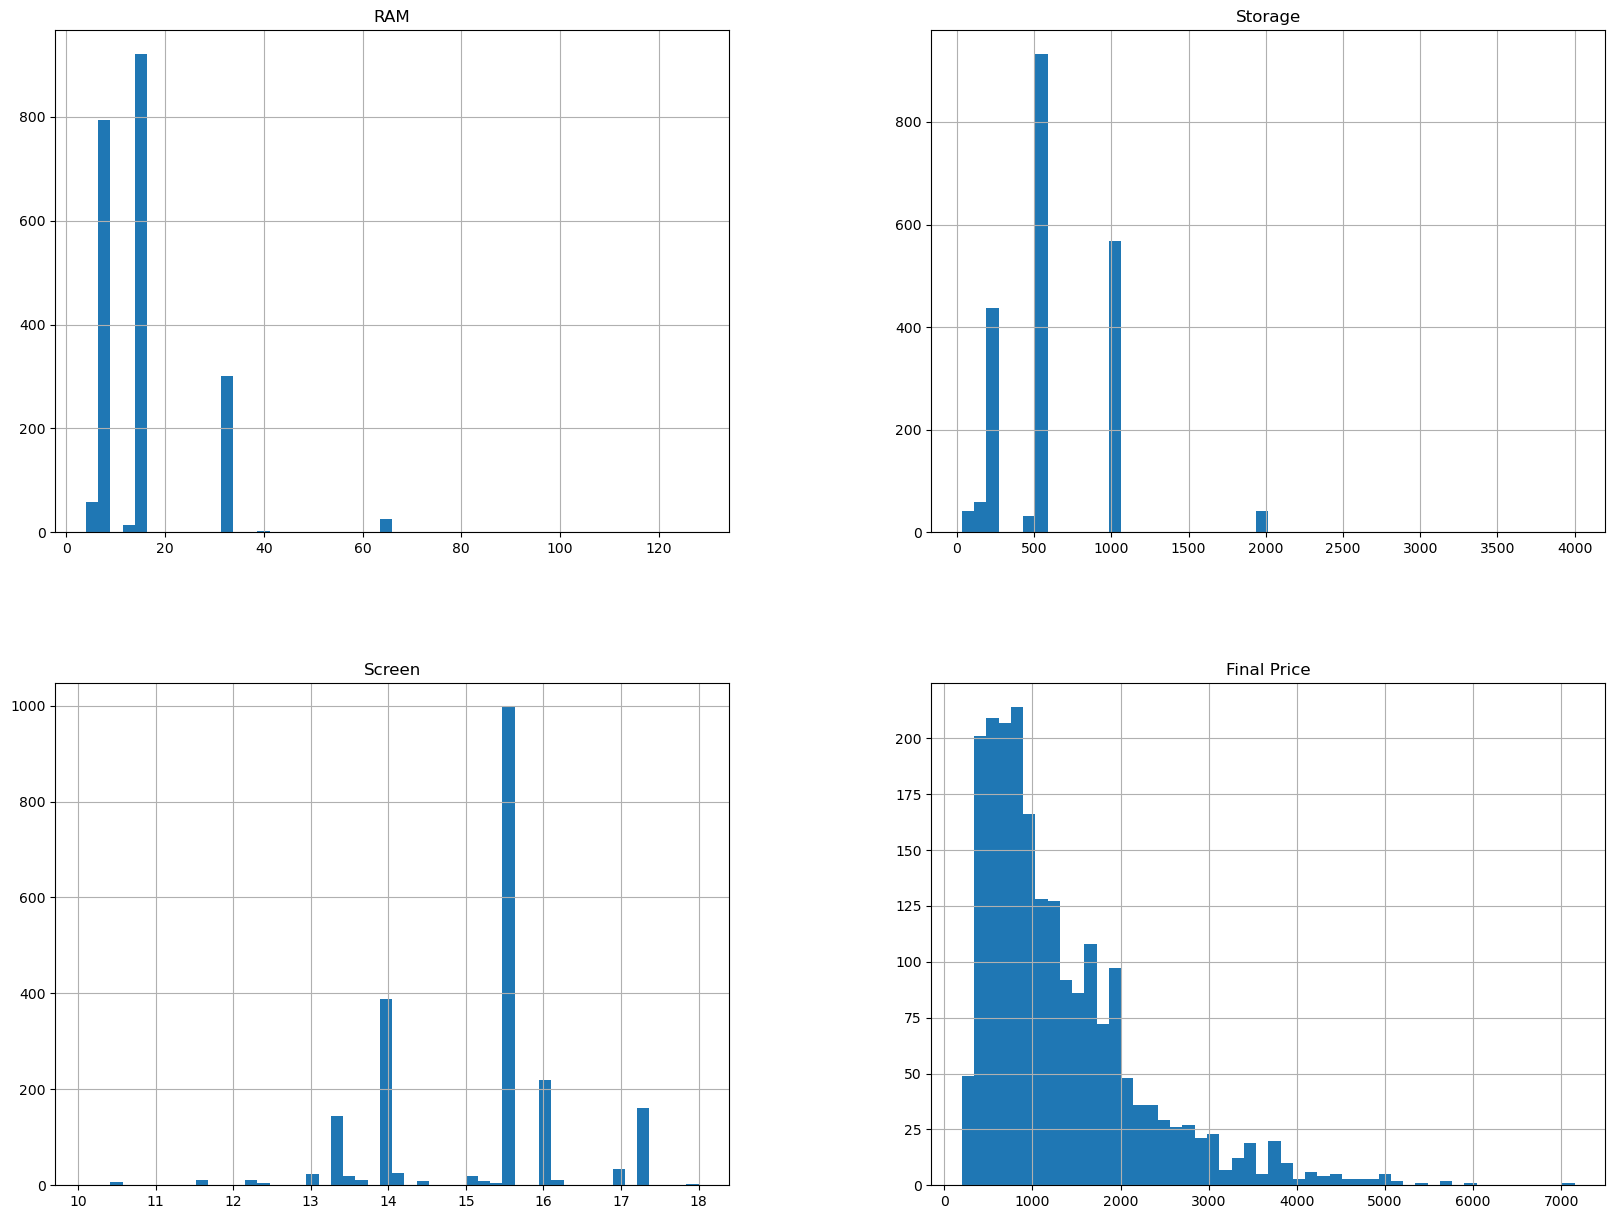

In [30]:
data.hist(bins=50,figsize=(20,15))

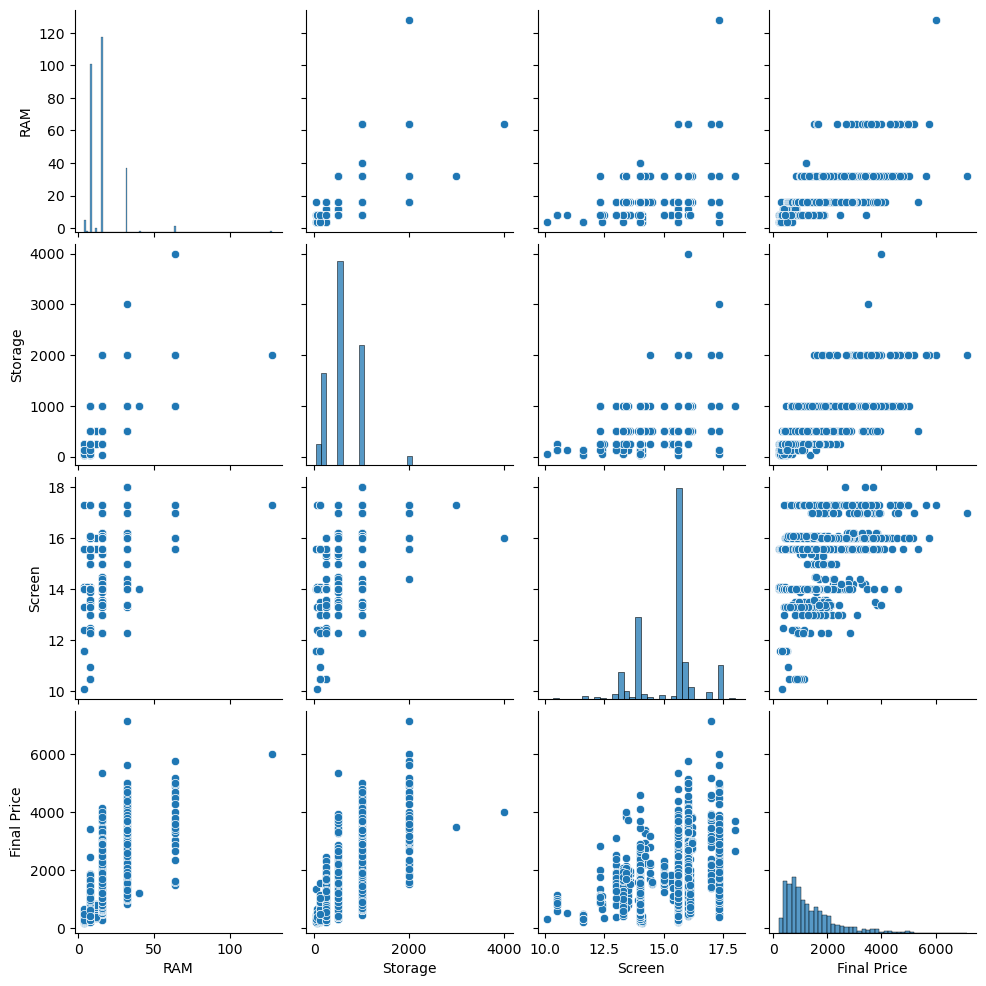

In [31]:
sns.pairplot(data)

In [32]:
lb = LabelEncoder()

In [33]:
data['Status'] = lb.fit_transform(data['Status'])

In [34]:
data['Brand'] = lb.fit_transform(data['Brand'])

In [35]:
data['Model'] = lb.fit_transform(data['Model'])

In [36]:
data['CPU'] = lb.fit_transform(data['CPU'])

In [37]:
data['Storage type'] = lb.fit_transform(data['Storage type'])

In [38]:
data['Touch'] = lb.fit_transform(data['Touch'])

In [39]:
data.head()

,Status,Brand,Model,CPU,RAM,Storage,Storage type,Screen,Touch,Final Price
0,0,3,41,16,8,512,0,15.6,0,1009.00
1,0,1,53,13,8,256,0,15.6,0,299.00
2,0,3,41,15,8,256,0,15.6,0,789.00
3,0,14,57,17,16,1000,0,15.6,0,1199.00
4,0,9,4,16,16,512,0,15.6,0,669.01


In [40]:
data.corr()

,Status,Brand,Model,CPU,RAM,Storage,Storage type,Screen,Touch,Final Price
Status,1.000000,-0.020238,0.054118,0.092861,0.118906,0.158497,-0.064382,0.002703,-0.064914,0.006613
Brand,-0.020238,1.000000,-0.019857,0.161018,0.131310,0.110227,-0.035690,0.004255,0.153424,0.176645
Model,0.054118,-0.019857,1.000000,0.101201,0.154876,0.083860,-0.128916,-0.107465,0.073506,0.136291
CPU,0.092861,0.161018,0.101201,1.000000,0.211585,0.176433,-0.056684,-0.033291,0.178272,0.249758
RAM,0.118906,0.131310,0.154876,0.211585,1.000000,0.749342,-0.161758,0.353850,0.033388,0.721708
Storage,0.158497,0.110227,0.083860,0.176433,0.749342,1.000000,-0.240714,0.386744,-0.010476,0.693506
Storage type,-0.064382,-0.035690,-0.128916,-0.056684,-0.161758,-0.240714,1.000000,-0.182772,0.078423,-0.164941
Screen,0.002703,0.004255,-0.107465,-0.033291,0.353850,0.386744,-0.182772,1.000000,-0.345964,0.259833
Touch,-0.064914,0.153424,0.073506,0.178272,0.033388,-0.010476,0.078423,-0.345964,1.000000,0.159081
Final Price,0.006613,0.176645,0.136291,0.249758,0.721708,0.693506,-0.164941,0.259833,0.159081,1.000000


In [41]:
data.corr()['Final Price']

Status          0.006613
Brand           0.176645
Model           0.136291
CPU             0.249758
RAM             0.721708
Storage         0.693506
Storage type   -0.164941
Screen          0.259833
Touch           0.159081
Final Price     1.000000
Name: Final Price, dtype: float64

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
x = data[['RAM','Storage',]]

In [44]:
y = data['Final Price']

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
model2 = RandomForestRegressor()

In [48]:
model_train2 = model2.fit(x_train,y_train)

In [49]:
pred2 = model_train2.predict(x_test)

In [50]:
r2_score(y_test,pred2)*100

58.81204002784657